# **YOLO**

In [1]:
!pip install ultralytics torchvision --quiet


In [2]:
import os
from tqdm import tqdm
from PIL import Image
import torchvision.transforms as T
from torchvision.datasets import GTSRB

# Set paths
root_dir = "/content/gtsrb_yolo"
img_dir = f"{root_dir}/images/train"
lbl_dir = f"{root_dir}/labels/train"

os.makedirs(img_dir, exist_ok=True)
os.makedirs(lbl_dir, exist_ok=True)

# Load dataset automatically (no manual download needed)
dataset = GTSRB(root=root_dir, split='train', download=True, transform=T.ToTensor())


In [3]:
# Loop over dataset and create YOLO formatted images and labels
for idx in tqdm(range(len(dataset)), desc="Preparing YOLO Dataset"):
    img, label = dataset[idx]
    img_pil = T.ToPILImage()(img)

    # Save image
    img_filename = f"{idx:05}.jpg"
    img_path = os.path.join(img_dir, img_filename)
    img_pil.save(img_path)

    # Save YOLO label (full image bounding box as placeholder)
    txt_filename = f"{idx:05}.txt"
    txt_path = os.path.join(lbl_dir, txt_filename)

    with open(txt_path, 'w') as f:
        f.write(f"{label} 0.5 0.5 1 1")


Preparing YOLO Dataset: 100%|██████████| 26640/26640 [00:31<00:00, 848.90it/s]


In [4]:
# Define class names (43 classes in GTSRB)
class_names = [str(i) for i in range(43)]

# Write data.yaml file
with open(f"{root_dir}/data.yaml", 'w') as f:
    f.write(f"train: {img_dir}\n")
    f.write(f"val: {img_dir}\n")  # Using same set for validation here (optional: split later)
    f.write(f"nc: 43\n")
    f.write(f"names: {class_names}\n")


In [6]:
# Use only first 500 images for quick demonstration
small_img_dir = f"{root_dir}/images/small_train"
small_lbl_dir = f"{root_dir}/labels/small_train"
os.makedirs(small_img_dir, exist_ok=True)
os.makedirs(small_lbl_dir, exist_ok=True)

for idx in range(500):
    os.system(f"cp {img_dir}/{idx:05}.jpg {small_img_dir}/")
    os.system(f"cp {lbl_dir}/{idx:05}.txt {small_lbl_dir}/")

# Update YAML for small set
with open(f"{root_dir}/small_data.yaml", 'w') as f:
    f.write(f"train: {small_img_dir}\n")
    f.write(f"val: {small_img_dir}\n")
    f.write(f"nc: 43\n")
    f.write(f"names: {class_names}\n")


In [7]:
model = YOLO("yolov8s.pt")

model.train(
    data=f"{root_dir}/small_data.yaml",
    epochs=5,            # Lower epochs for faster results
    imgsz=416,
    batch=8,
    name="yolo_gtsrb_small",
    project="/content"
)


Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gtsrb_yolo/small_data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_gtsrb_small, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

train: Scanning /content/gtsrb_yolo/labels/small_train... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<00:00, 1633.57it/s]

train: New cache created: /content/gtsrb_yolo/labels/small_train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 33.6±15.0 MB/s, size: 1.4 KB)



val: Scanning /content/gtsrb_yolo/labels/small_train.cache... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]


Plotting labels to /content/yolo_gtsrb_small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000213, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to /content/yolo_gtsrb_small
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.5557      3.422       1.21         14        416: 100%|██████████| 63/63 [09:44<00:00,  9.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [03:45<00:00,  7.04s/it]

                   all        500        500      0.488      0.957      0.573      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.1669      1.148      0.972         13        416: 100%|██████████| 63/63 [09:46<00:00,  9.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [03:35<00:00,  6.74s/it]

                   all        500        500      0.788       0.94      0.955      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.1289     0.8136     0.9246         14        416: 100%|██████████| 63/63 [09:45<00:00,  9.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [03:34<00:00,  6.72s/it]

                   all        500        500       0.95      0.968      0.989      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G     0.1187     0.6469     0.9051         10        416: 100%|██████████| 63/63 [09:41<00:00,  9.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [03:33<00:00,  6.67s/it]

                   all        500        500      0.907      0.922       0.99      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G     0.1031     0.6197     0.9076         14        416: 100%|██████████| 63/63 [09:32<00:00,  9.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [03:33<00:00,  6.66s/it]

                   all        500        500      0.949      0.924      0.995      0.994



5 epochs completed in 1.111 hours.
Optimizer stripped from /content/yolo_gtsrb_small/weights/last.pt, 22.5MB
Optimizer stripped from /content/yolo_gtsrb_small/weights/best.pt, 22.5MB

Validating /content/yolo_gtsrb_small/weights/best.pt...
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,142,225 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [03:16<00:00,  6.13s/it]


                   all        500        500      0.951      0.922      0.995      0.994
                     0        150        150      0.902          1      0.995      0.995
                     1        350        350          1      0.845      0.995      0.993
Speed: 1.7ms preprocess, 383.7ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/yolo_gtsrb_small


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b2bc5b10310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [10]:
# Evaluate the trained YOLO model on the validation set
metrics = model.val()

# Display evaluation metrics
print("mAP@0.5:", metrics.box.map50)
print("Precision:", metrics.box.p)
print("Recall:", metrics.box.r)

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 92.2±61.7 MB/s, size: 1.9 KB)


val: Scanning /content/gtsrb_yolo/labels/small_train.cache... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [03:22<00:00,  3.22s/it]


                   all        500        500      0.951      0.922      0.995      0.994
                     0        150        150      0.902          1      0.995      0.995
                     1        350        350          1      0.845      0.995      0.993
Speed: 1.2ms preprocess, 396.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/yolo_gtsrb_small4
mAP@0.5: 0.9948245697261808
Precision: [    0.90152           1]
Recall: [          1     0.84466]


In [11]:
# Run detection on the same images and save results
results = model.predict(source=small_img_dir, imgsz=416, conf=0.25, save=True)

# The results with bounding boxes are saved in /content/runs/detect/



image 1/500 /content/gtsrb_yolo/images/small_train/00000.jpg: 416x416 1 0, 1038.3ms
image 2/500 /content/gtsrb_yolo/images/small_train/00001.jpg: 416x416 1 0, 380.2ms
image 3/500 /content/gtsrb_yolo/images/small_train/00002.jpg: 416x416 1 0, 328.3ms
image 4/500 /content/gtsrb_yolo/images/small_train/00003.jpg: 416x416 1 0, 401.4ms
image 5/500 /content/gtsrb_yolo/images/small_train/00004.jpg: 416x416 2 0s, 295.8ms
image 6/500 /content/gtsrb_yolo/images/small_train/00005.jpg: 416x416 1 0, 323.0ms
image 7/500 /content/gtsrb_yolo/images/small_train/00006.jpg: 416x416 1 0, 432.3ms
image 8/500 /content/gtsrb_yolo/images/small_train/00007.jpg: 416x416 1 0, 329.4ms
image 9/500 /content/gtsrb_yolo/images/small_train/00008.jpg: 416x416 1 0, 350.6ms
image 10/500 /content/gtsrb_yolo/images/small_train/00009.jpg: 416x416 1 0, 334.7ms
image 11/500 /content/gtsrb_yolo/images/small_train/00010.jpg: 416x416 1 0, 342.3ms
image 12/500 /content/gtsrb_yolo/images/small_train/00011.jpg: 416x416 2 0s, 447.9

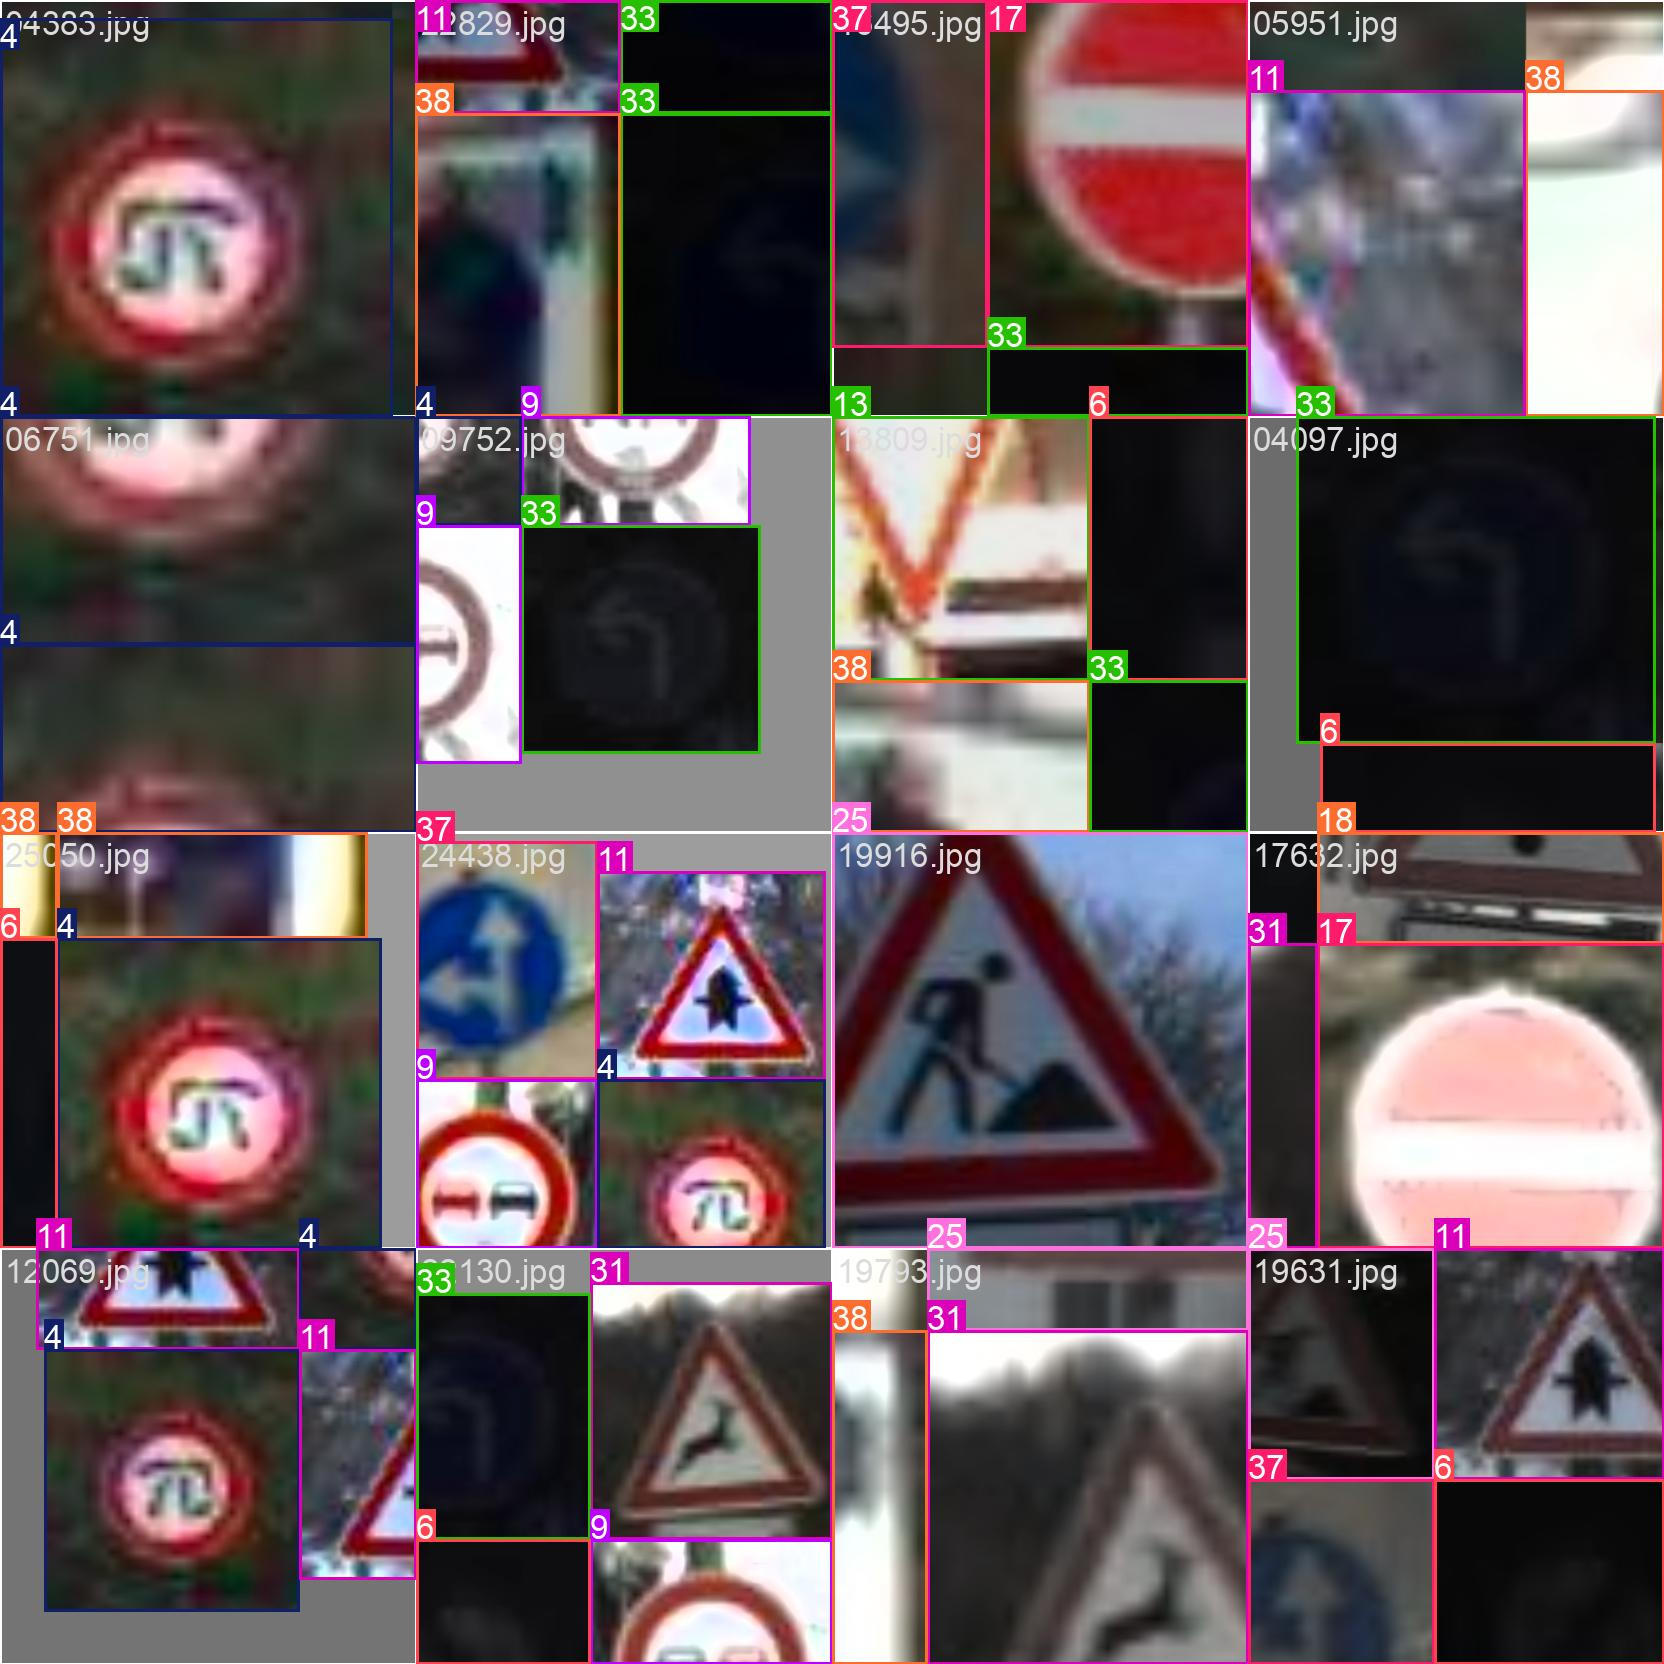

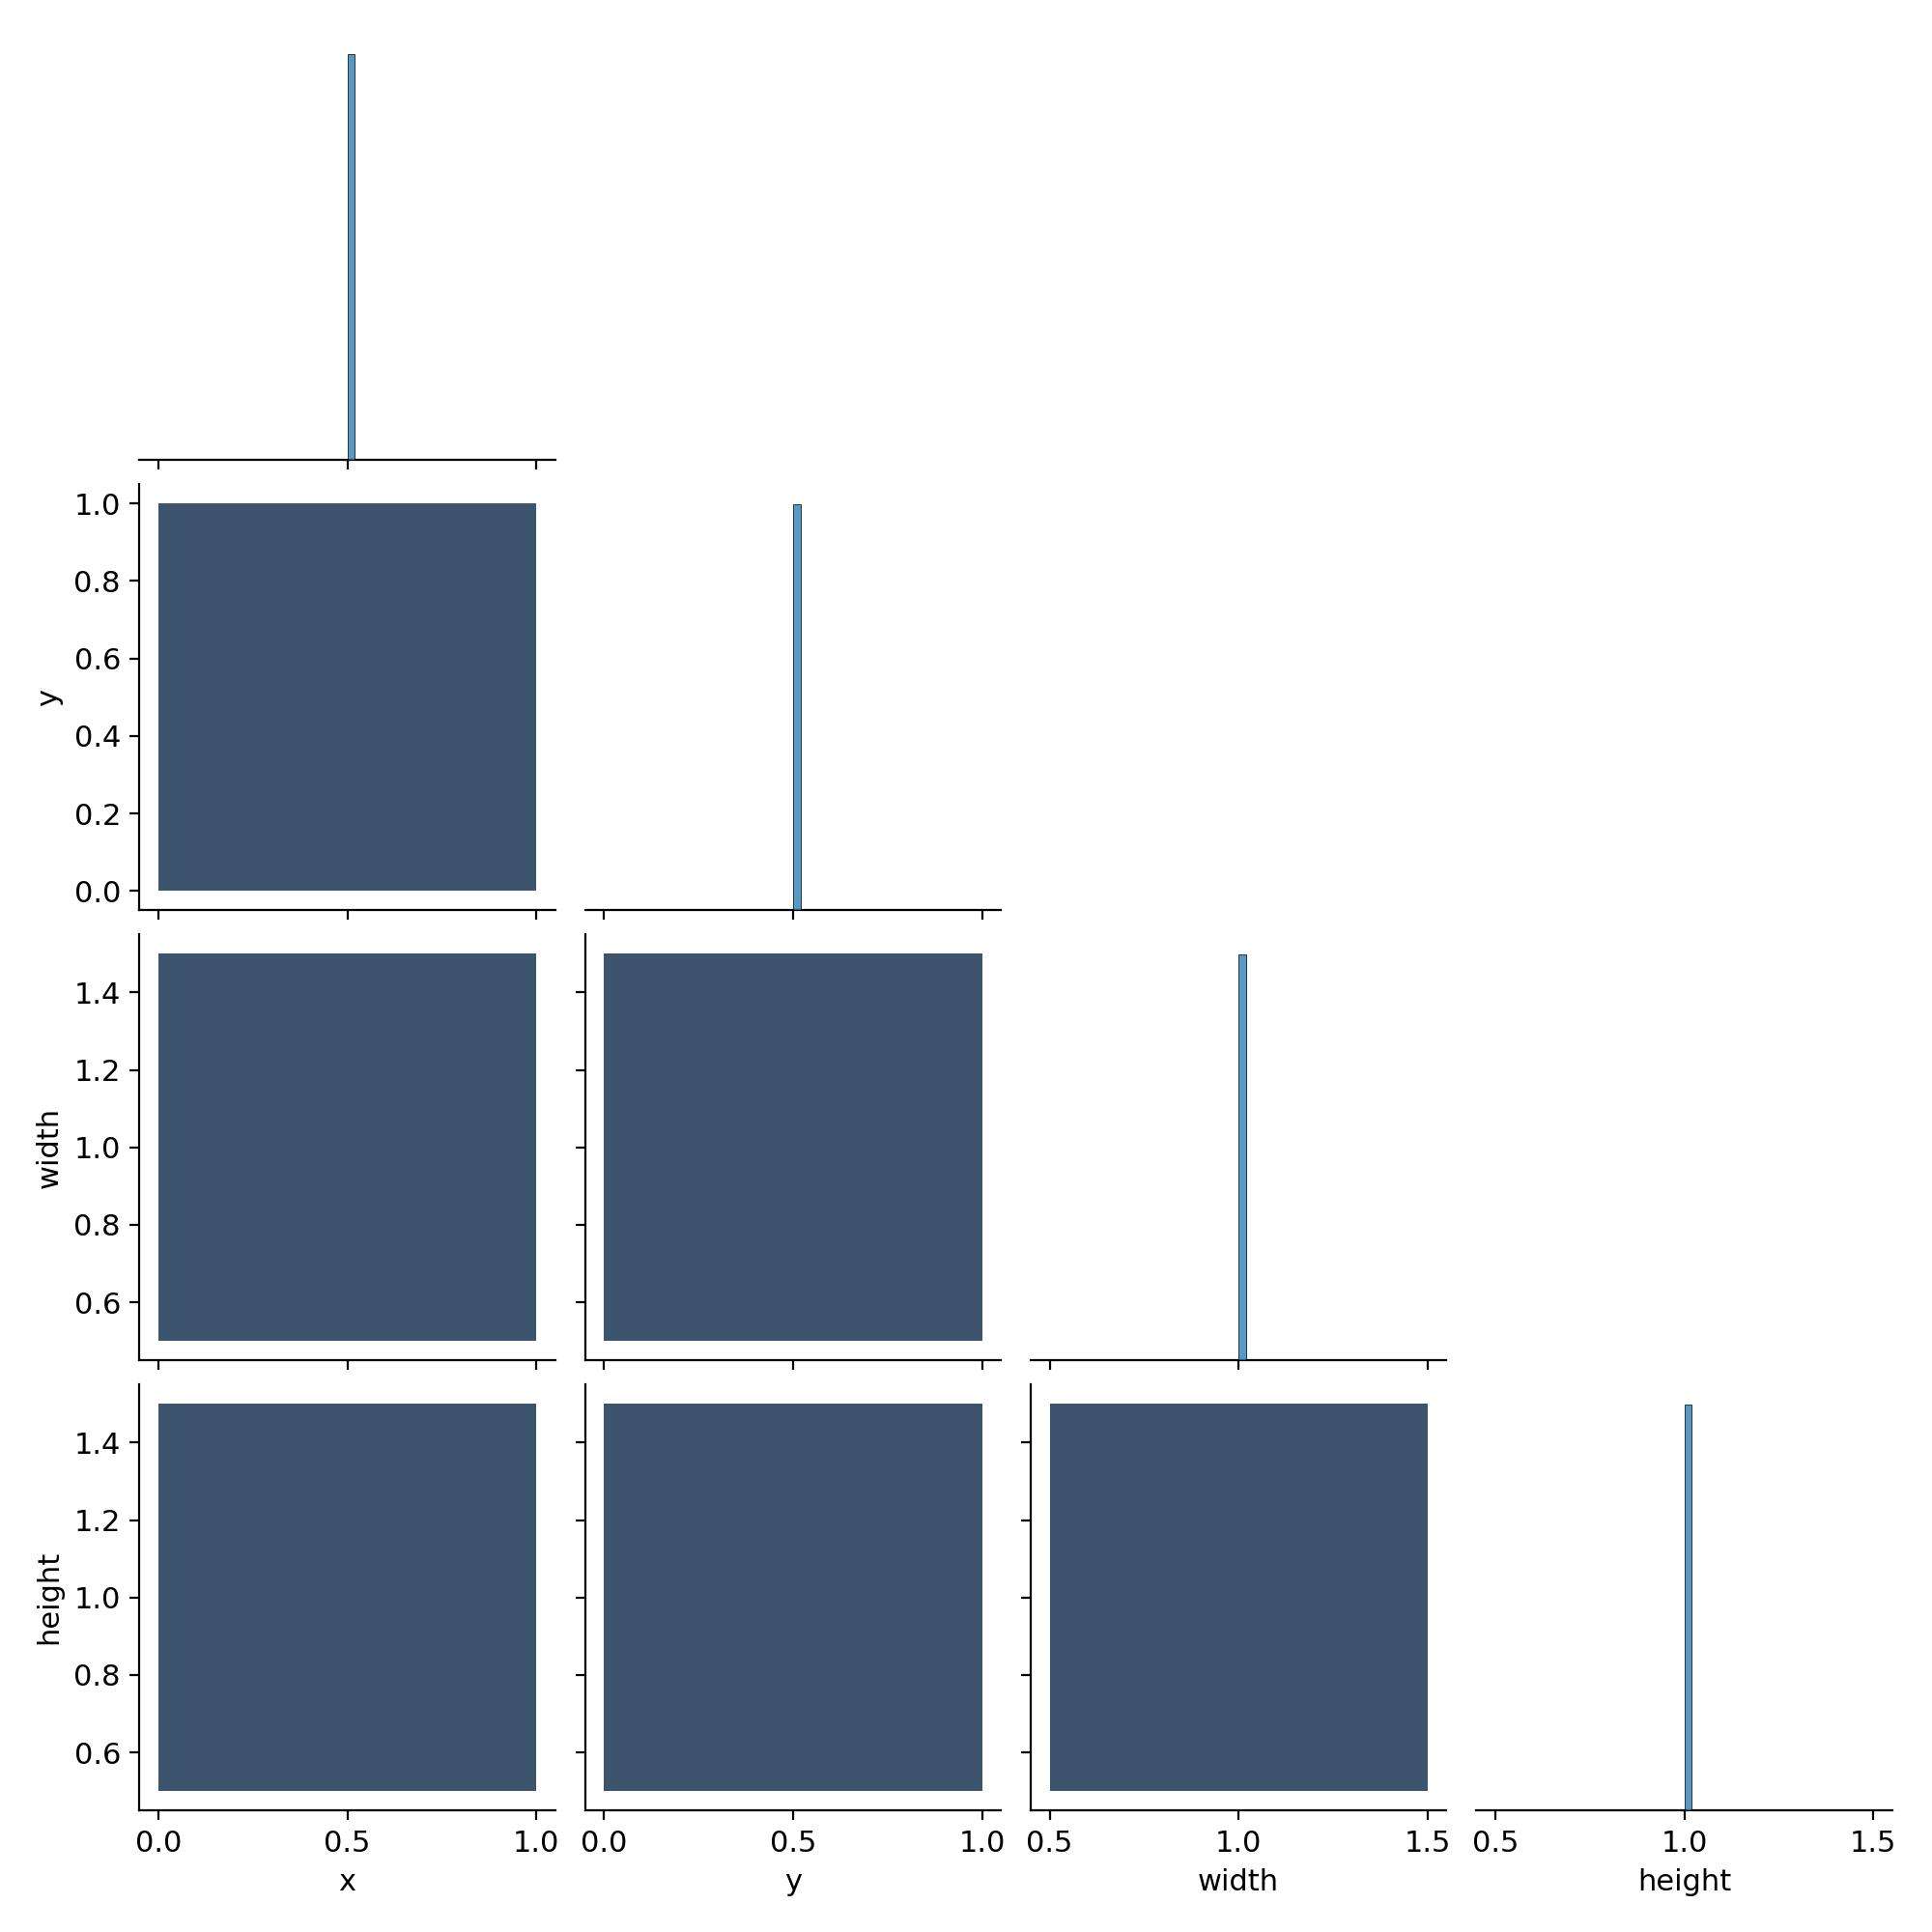

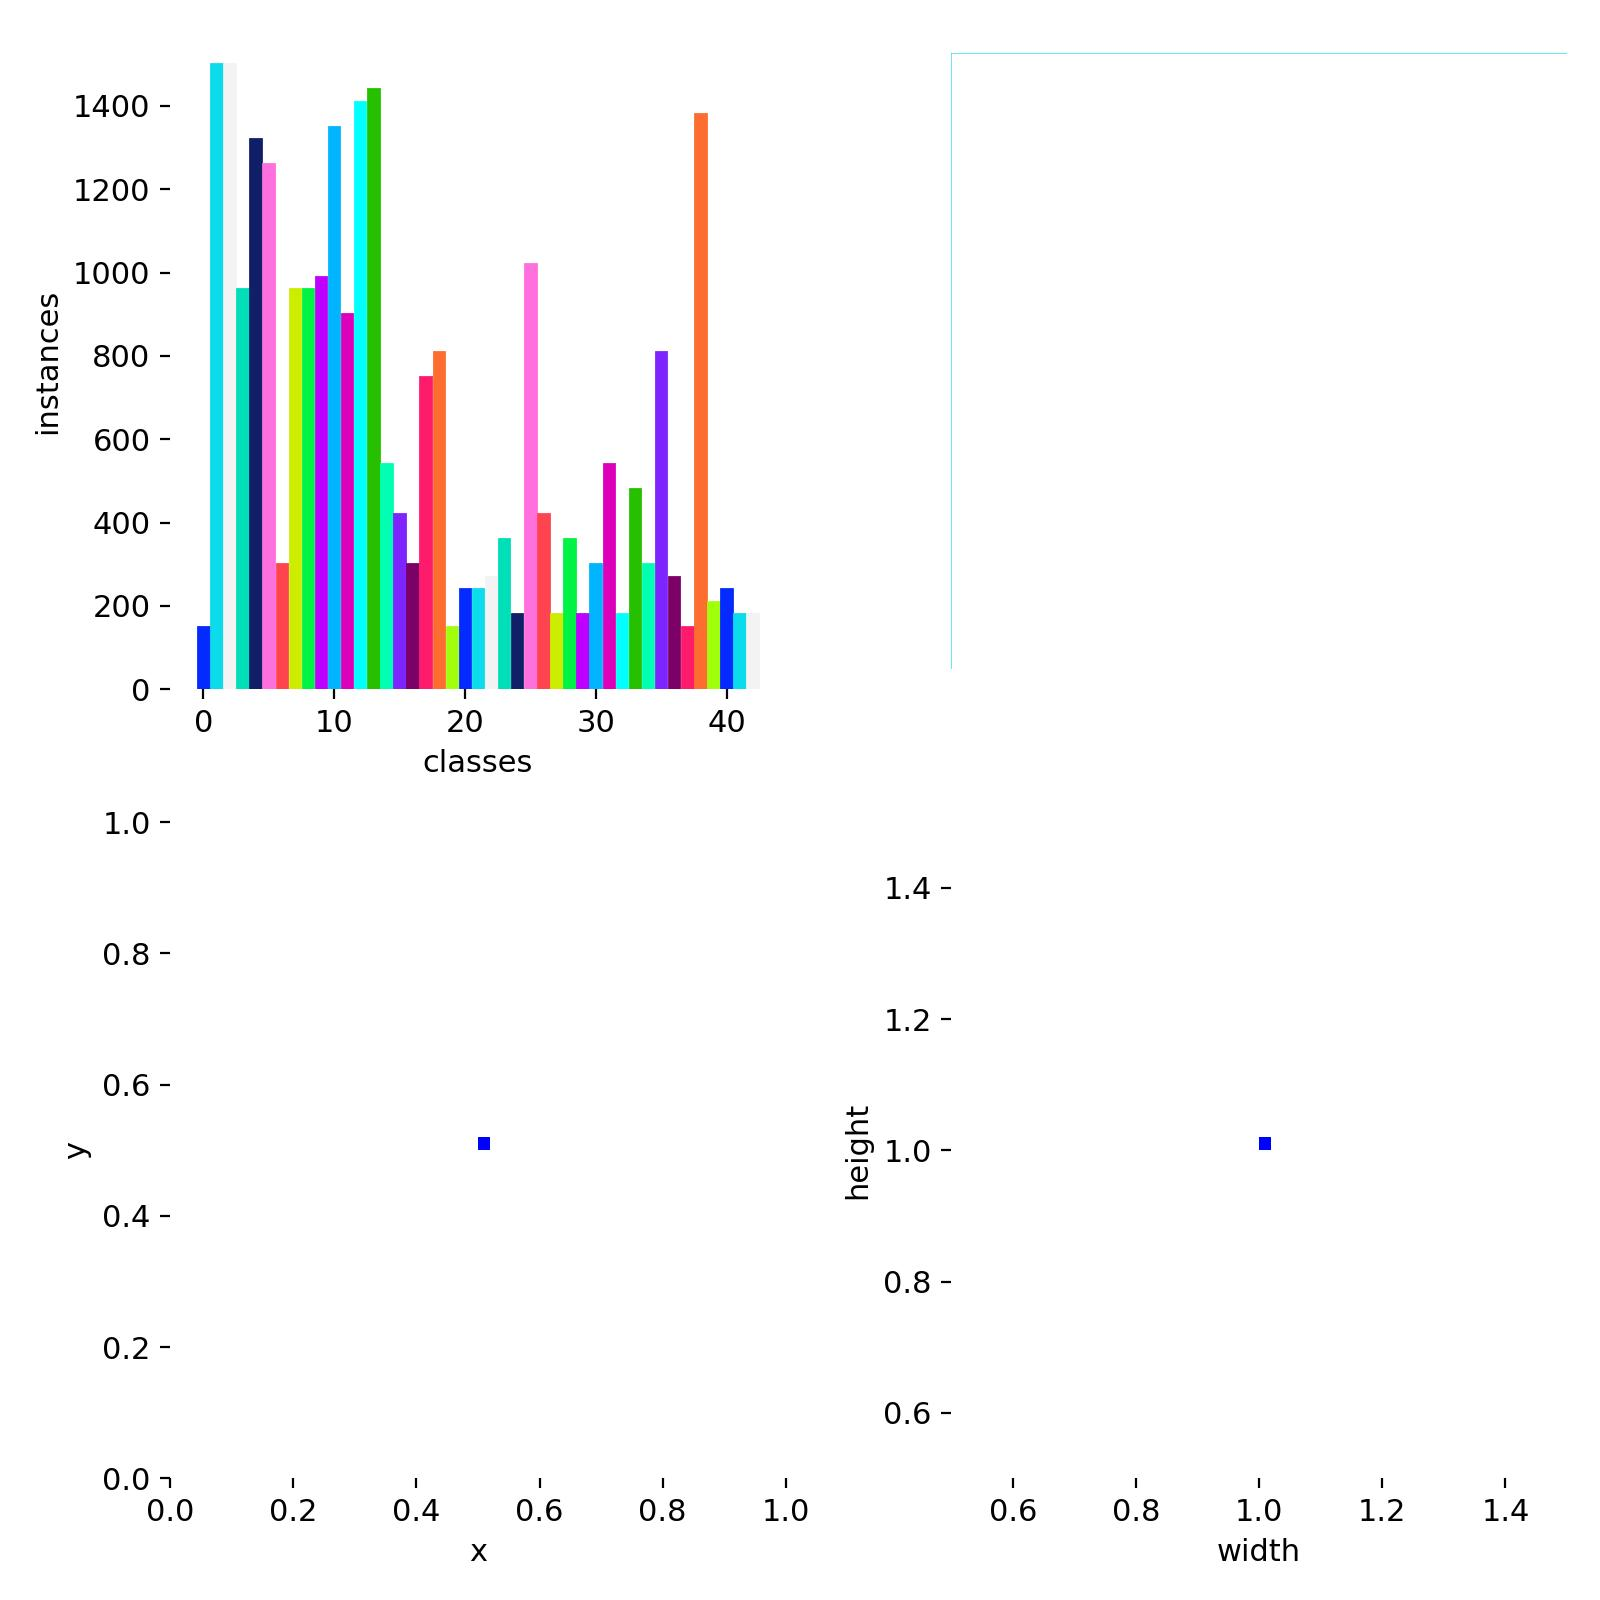

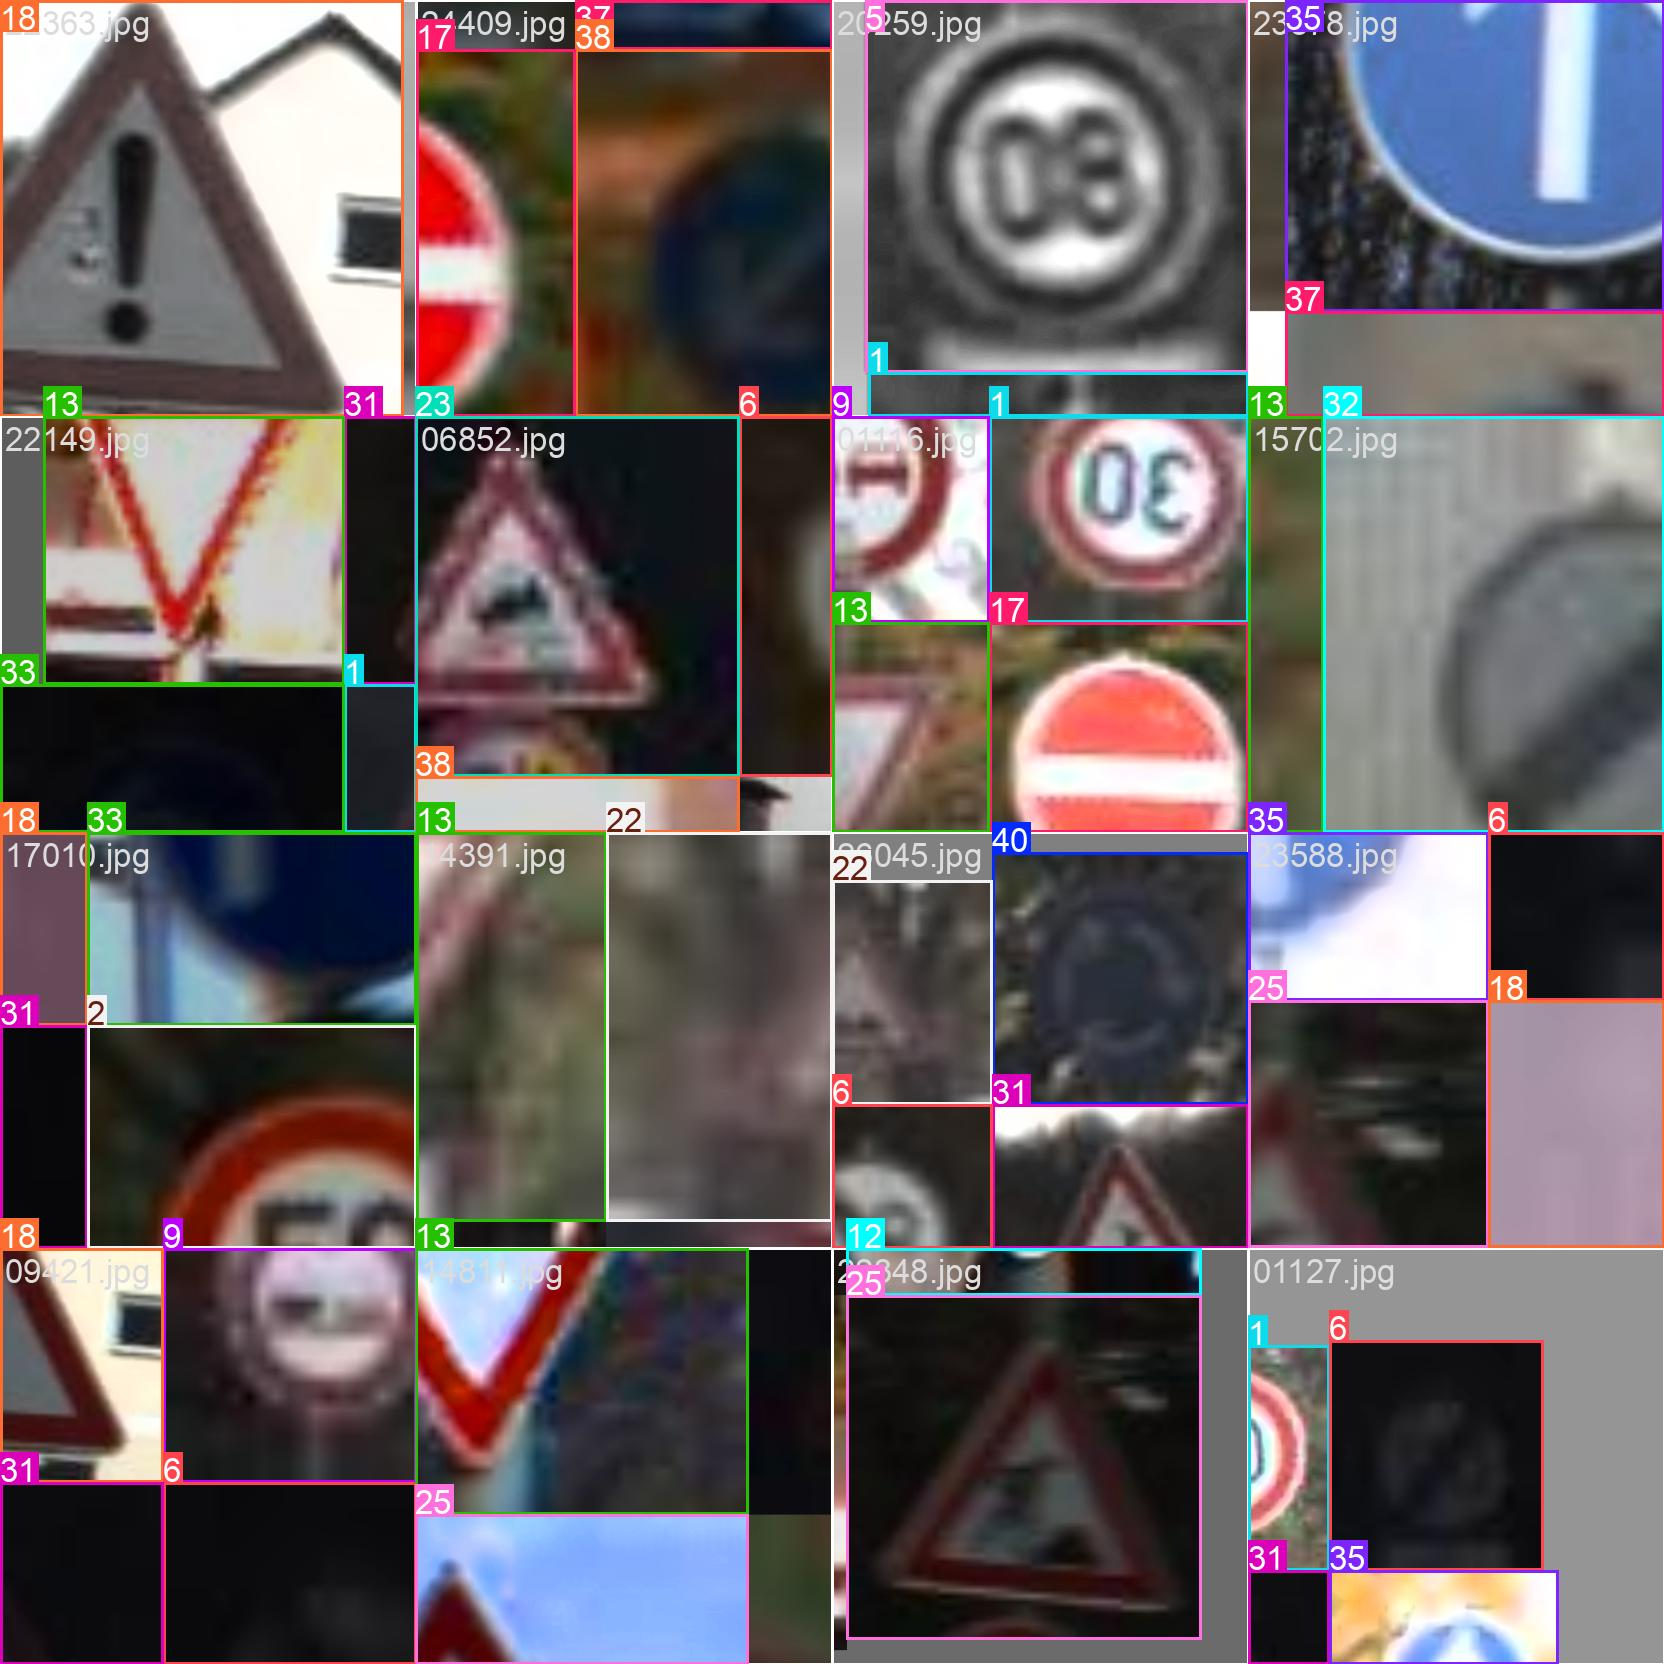

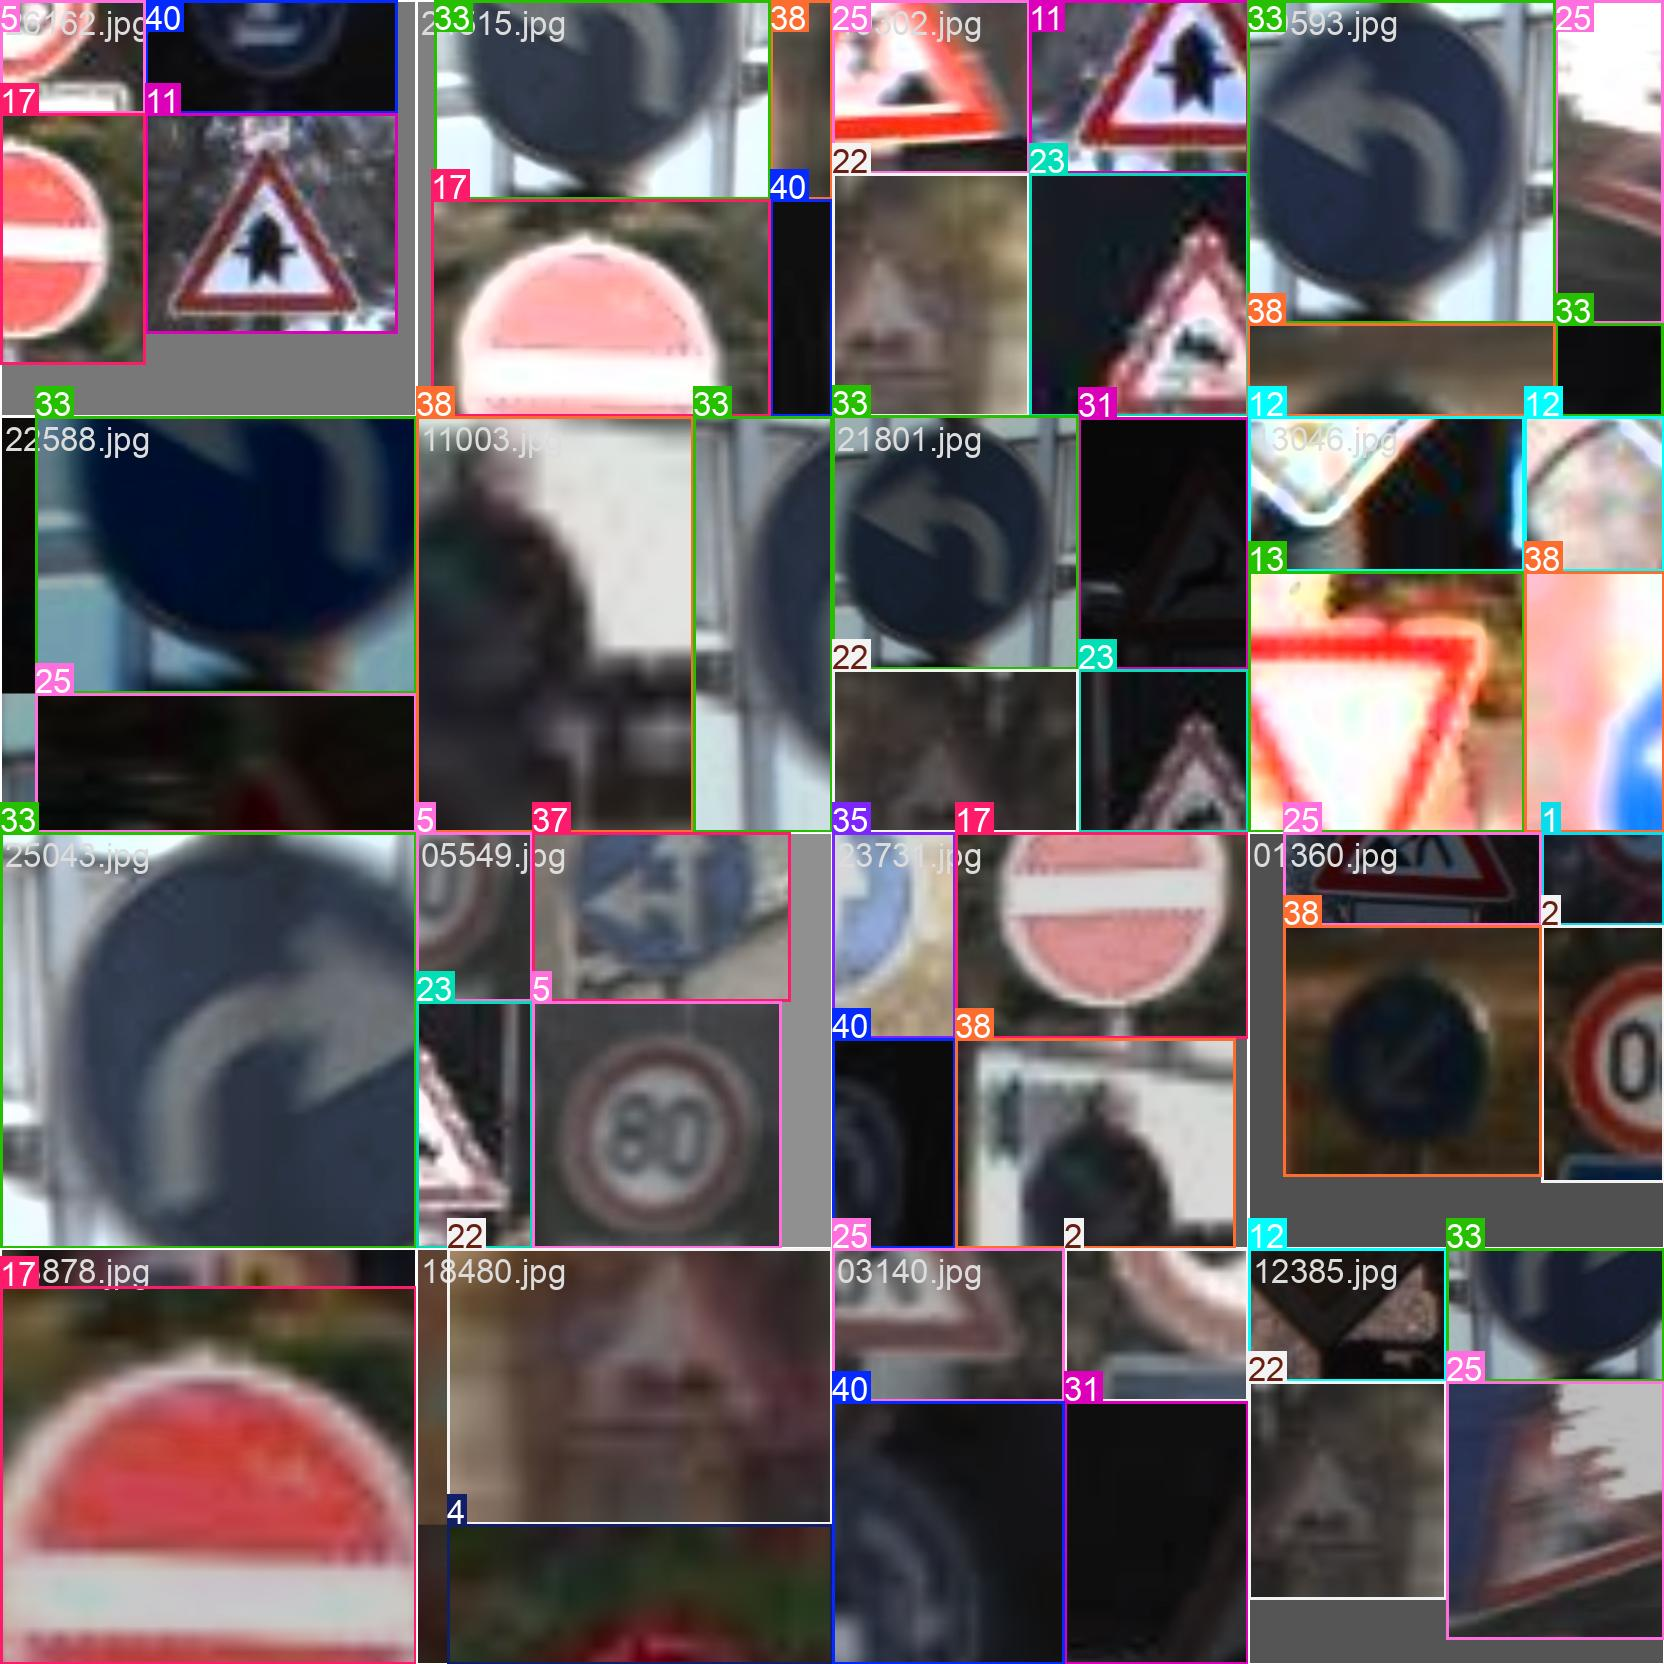

In [12]:
import glob
from IPython.display import Image, display

# Display some of the detected images
result_images = glob.glob('/content/runs/detect/*/*.jpg')

for img_path in result_images[:5]:
    display(Image(filename=img_path))


# **cnn**

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import GTSRB
import matplotlib.pyplot as plt


In [14]:
# Transformations: Resize to 32x32, Convert to Tensor, Normalize
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load Training and Testing datasets from GTSRB
train_set = GTSRB(root='/content/gtsrb_cnn', split='train', download=True, transform=transform)
test_set = GTSRB(root='/content/gtsrb_cnn', split='test', download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)


100%|██████████| 187M/187M [00:06<00:00, 28.5MB/s]
100%|██████████| 89.0M/89.0M [00:03<00:00, 23.1MB/s]
100%|██████████| 99.6k/99.6k [00:00<00:00, 324kB/s]


In [15]:
class TrafficSignCNN(nn.Module):
    def __init__(self, num_classes=43):
        super(TrafficSignCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  # Input: 3x32x32
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Output: 32x16x16

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)  # Output: 64x8x8
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*8*8, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Instantiate model
cnn_model = TrafficSignCNN(num_classes=43)


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Training Loop
num_epochs = 5  # You can increase for better results

train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    cnn_model.train()

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

Test Accuracy: 0.8998


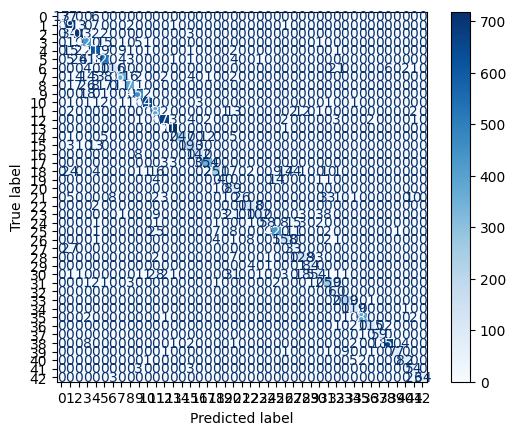

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

cnn_model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate Accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(43)))
disp.plot(cmap='Blues')
plt.show()

In [21]:
# Save the trained CNN model as .pth file
cnn_model_path = "/content/cnn_traffic_sign_model.pth"
torch.save(cnn_model.state_dict(), cnn_model_path)

print(f"CNN model saved to: {cnn_model_path}")


CNN model saved to: /content/cnn_traffic_sign_model.pth


# **combinned**

In [22]:
from ultralytics import YOLO

# Load YOLO model
yolo_model = YOLO("/content/yolo_gtsrb_small/weights/best.pt")

# Load CNN model
cnn_model = TrafficSignCNN(num_classes=43)
cnn_model.load_state_dict(torch.load("/content/cnn_traffic_sign_model.pth", map_location=torch.device('cpu')))
cnn_model.eval()


TrafficSignCNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=256, out_features=43, bias=True)
  )
)

In [23]:
from torchvision import transforms

cnn_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])



image 1/1 /content/gtsrb_yolo/images/train/00010.jpg: 416x416 1 0, 933.4ms
Speed: 34.3ms preprocess, 933.4ms inference, 6.9ms postprocess per image at shape (1, 3, 416, 416)


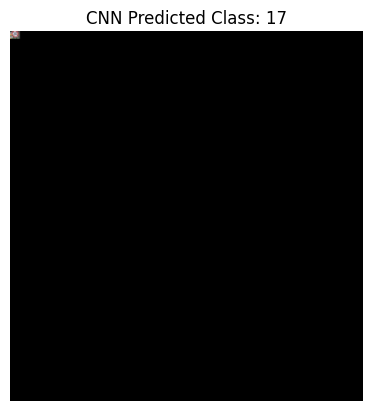

In [24]:
import matplotlib.pyplot as plt
from PIL import Image

# Sample image path (replace with your test image)
image_path = "/content/gtsrb_yolo/images/train/00010.jpg"

# Run YOLO detection
results = yolo_model.predict(image_path, conf=0.25, imgsz=416)

# Load original image
original_img = Image.open(image_path).convert('RGB')
width, height = original_img.size

for result in results:
    for box in result.boxes:
        # YOLO detection box in normalized format
        x_center, y_center, w, h = box.xywh[0].tolist()

        # Convert to pixel coordinates
        xmin = int((x_center - w / 2) * width)
        ymin = int((y_center - h / 2) * height)
        xmax = int((x_center + w / 2) * width)
        ymax = int((y_center + h / 2) * height)

        # Crop detected area
        cropped_img = original_img.crop((xmin, ymin, xmax, ymax))

        # Prepare cropped image for CNN
        cnn_input = cnn_transform(cropped_img).unsqueeze(0)

        # Predict with CNN
        with torch.no_grad():
            output = cnn_model(cnn_input)
            _, predicted_class = output.max(1)

        # Display
        plt.imshow(cropped_img)
        plt.title(f"CNN Predicted Class: {predicted_class.item()}")
        plt.axis('off')
        plt.show()


In [25]:
from google.colab import files

# Replace with your correct path if different
files.download('/content/yolo_gtsrb_small/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
files.download('/content/cnn_traffic_sign_model.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
files.download('/content/Traffic_Sign_YOLO_CNN.ipynb')


FileNotFoundError: Cannot find file: /content/Traffic_Sign_YOLO_CNN.ipynb